In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
from sklearn import datasets, svm, metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# LOAD DATASETS

In [4]:
dat1 = pd.read_csv('/content/drive/MyDrive/ML/Data_Driven_Marketing/Data-Driven-Marketing-Project2/Data/final_df.csv')
dat1= dat1.drop(columns = ['Unnamed: 0'])
dat1.head()

,age,duration,campaign,previous,emp.var.rate,cons.conf.idx,y,job_rank,month_name,day_name,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,age_group_middle_age,age_group_old,age_group_young,duration_group_2mins_4mins,duration_group_less_2mins,duration_group_more_4mins,campaign_group_less,previous_group_more_than_2,previous_group_one,previous_group_two,previous_group_zero
0,0.481481,0.010352,-0.565963,-0.349551,0.648101,0.886568,0,-1.750910,0.222222,0.0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1
1,0.493827,-0.421577,-0.565963,-0.349551,0.648101,0.886568,0,-0.005088,0.222222,0.0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1
2,0.246914,-0.124626,-0.565963,-0.349551,0.648101,0.886568,0,-0.005088,0.222222,0.0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1
3,0.283951,-0.413864,-0.565963,-0.349551,0.648101,0.886568,0,-0.005088,0.222222,0.0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1
4,0.481481,0.187751,-0.565963,-0.349551,0.648101,0.886568,0,-0.005088,0.222222,0.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1


In [10]:
dat2 = pd.read_csv('/content/drive/MyDrive/ML/Data_Driven_Marketing/Data-Driven-Marketing-Project2/Data/fillna.csv')
dat2 = dat2.drop(columns = ['Unnamed: 0']) 
dat2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,job_rank,month_name,day_name
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,old,1,5,2
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,old,2,5,2
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,middle_age,2,5,2
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,middle_age,2,5,2
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,old,2,5,2


In [11]:
dat2.isnull().sum().sum()

0

# DATA VISUALIZE

In [13]:
def print_unique_col_values(data):
       for column in data:
            if data[column].dtypes=='object':
                print(f'{column}: {data[column].unique()}') 
print_unique_col_values(dat2)

job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']
marital: ['married' 'single' 'divorced']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']
default: ['no' 'yes']
housing: ['no' 'yes']
loan: ['no' 'yes']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome: ['nonexistent' 'failure' 'success']
y: ['no' 'yes']
age_group: ['old' 'middle_age' 'young']


In [19]:
def visualize_categorical_column(col, label):
  fm = dat2[col].value_counts()
  plt.pie(fm,labels=label,autopct='%1.1f%%')
  plt.show()

In [21]:
dat2['default'].value_counts()

no     41173
yes        3
Name: default, dtype: int64

no     36537
yes     4639
Name: y, dtype: int64


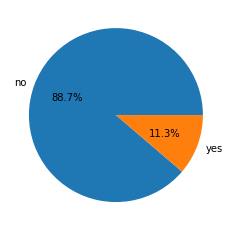

In [27]:
fm = dat2.y.value_counts()
print(fm)
plt.pie(fm,labels=['no', 'yes'],autopct='%1.1f%%')
plt.show()

In [24]:
dat2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'age_group',
       'job_rank', 'month_name', 'day_name'],
      dtype='object')

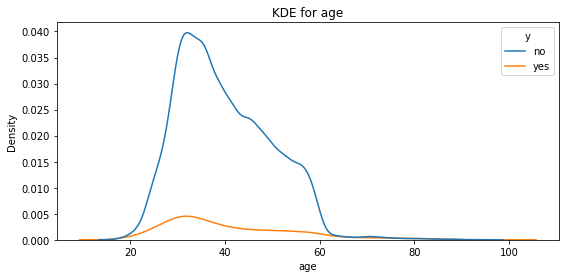

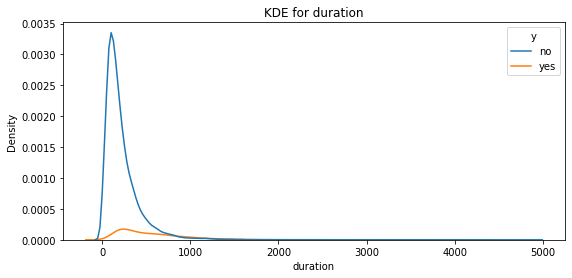

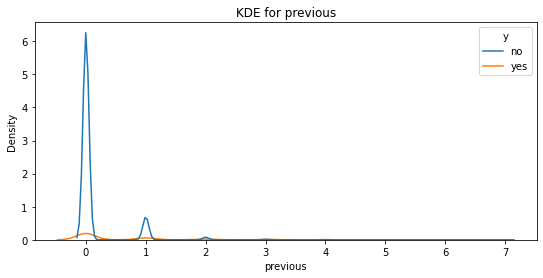

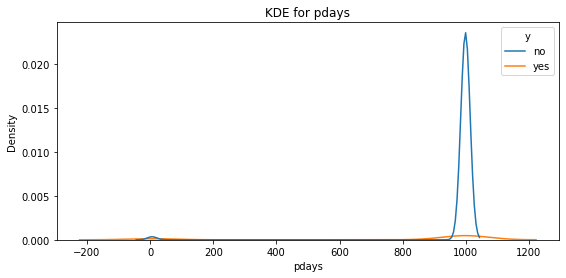

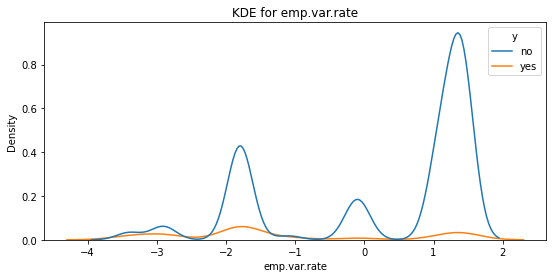

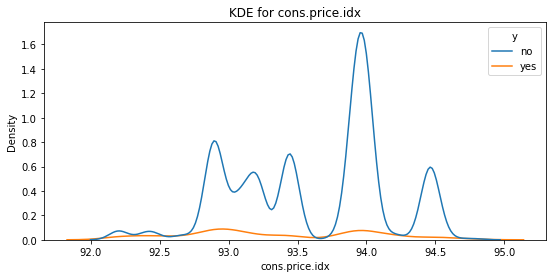

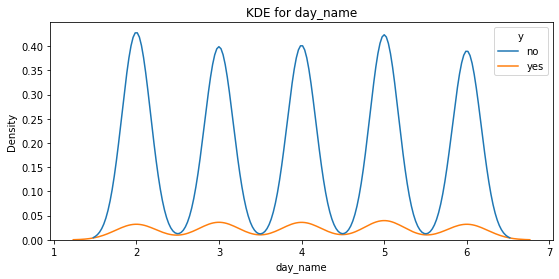

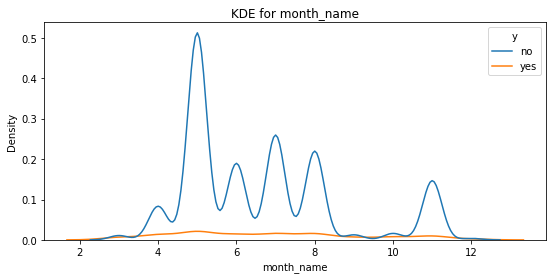

In [26]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax = sns.kdeplot(data=dat2, x= dat2[feature], hue='y')
kdeplot('age')
kdeplot('duration')
kdeplot('previous')
kdeplot('pdays')
kdeplot('emp.var.rate')
kdeplot('cons.price.idx')
kdeplot('day_name')
kdeplot('month_name')

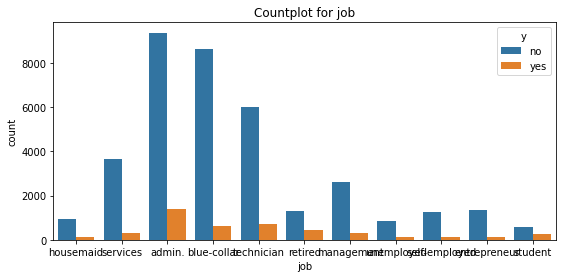

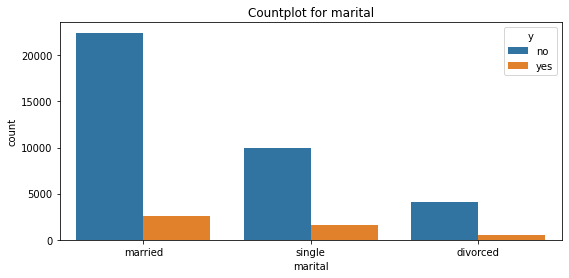

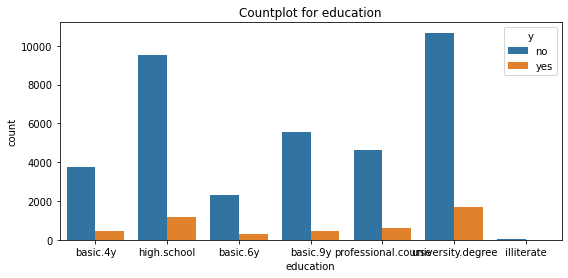

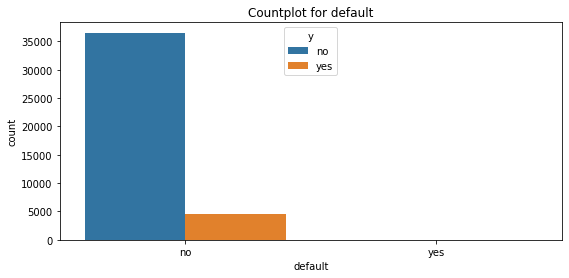

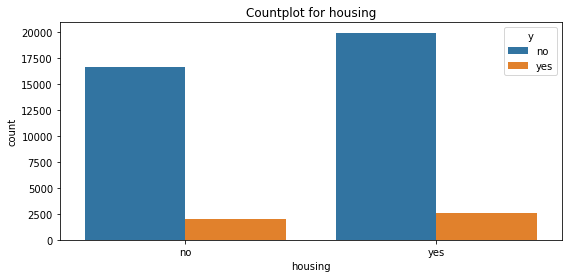

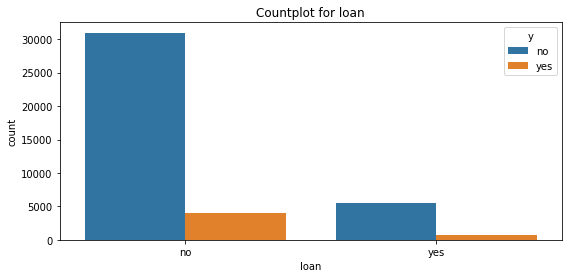

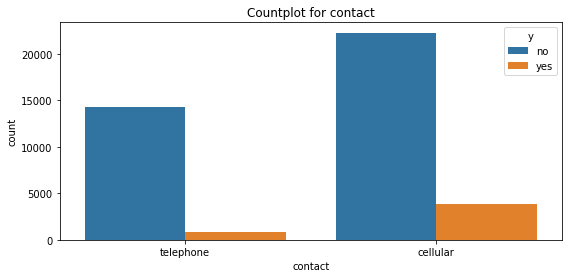

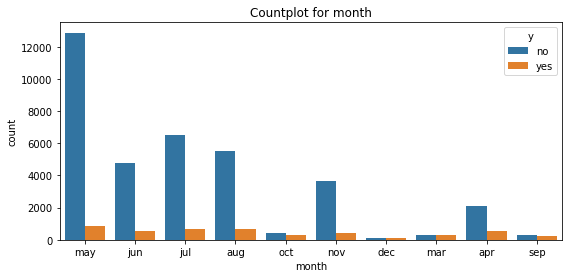

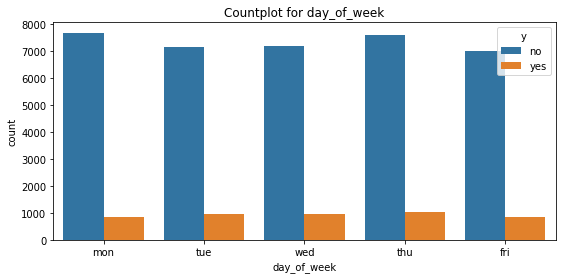

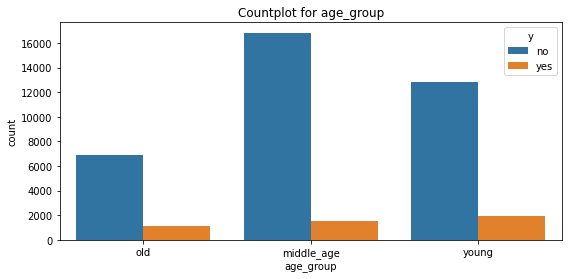

In [28]:
def plot_count(cate_var):
  plt.figure(figsize=(9, 4))
  plt.title("Countplot for {}".format(cate_var))
  ax = sns.countplot(x=dat2[cate_var], hue='y', data=dat2)

plot_count('job')
plot_count('marital')
plot_count('education')
plot_count('default')
plot_count('housing')
plot_count('loan')
plot_count('contact')
plot_count('month')
plot_count('day_of_week')
plot_count('age_group')

# DATA PROCESSING

Drop : 

In [29]:
dat1.head()

,age,duration,campaign,previous,emp.var.rate,cons.conf.idx,y,job_rank,month_name,day_name,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,age_group_middle_age,age_group_old,age_group_young,duration_group_2mins_4mins,duration_group_less_2mins,duration_group_more_4mins,campaign_group_less,previous_group_more_than_2,previous_group_one,previous_group_two,previous_group_zero
0,0.481481,0.010352,-0.565963,-0.349551,0.648101,0.886568,0,-1.750910,0.222222,0.0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1
1,0.493827,-0.421577,-0.565963,-0.349551,0.648101,0.886568,0,-0.005088,0.222222,0.0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1
2,0.246914,-0.124626,-0.565963,-0.349551,0.648101,0.886568,0,-0.005088,0.222222,0.0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1
3,0.283951,-0.413864,-0.565963,-0.349551,0.648101,0.886568,0,-0.005088,0.222222,0.0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1
4,0.481481,0.187751,-0.565963,-0.349551,0.648101,0.886568,0,-0.005088,0.222222,0.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1


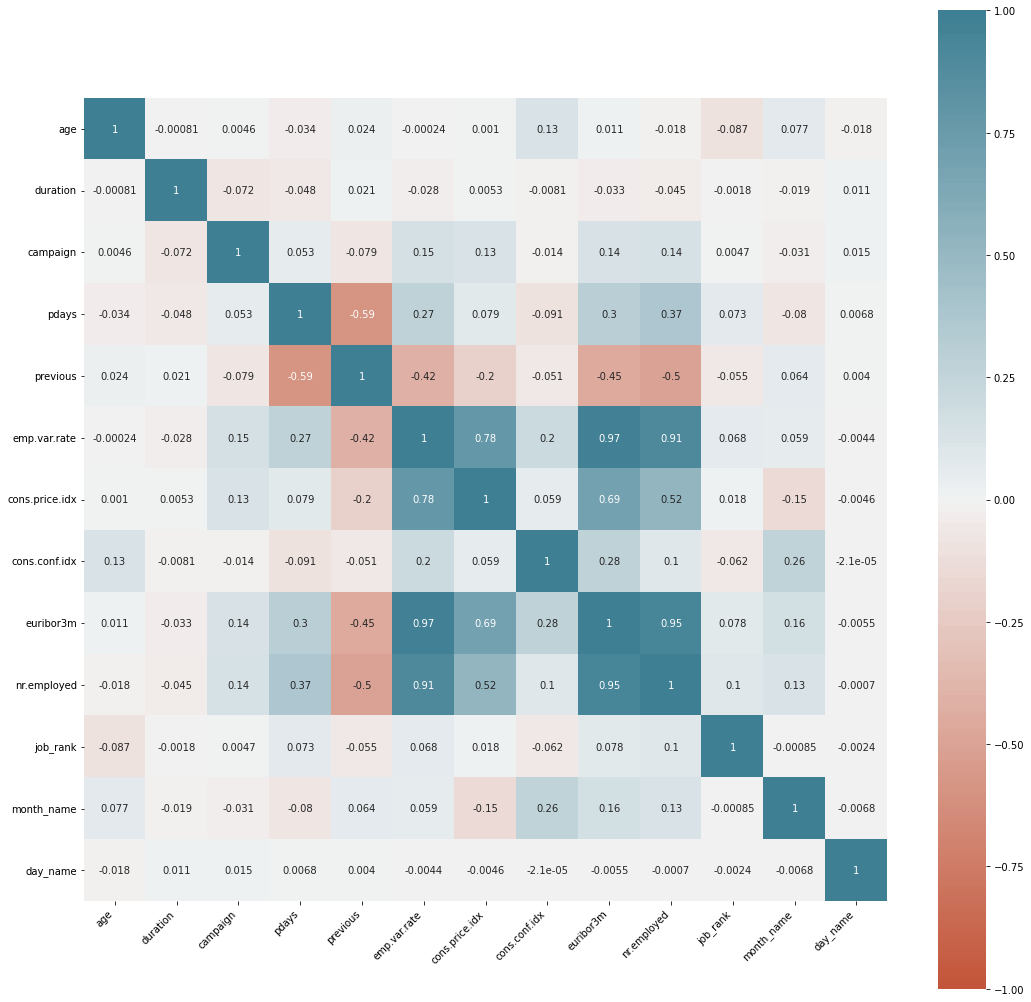

In [32]:
set_option('precision', 2)
cor = dat2.corr(method='pearson')
# select features that have high absolute correlation with output.
fig, ax = plt.subplots(figsize=(18,18))         # Sample figsize in inches
sns.heatmap(
    cor, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax=ax,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [34]:
dat1.columns

Index(['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.conf.idx', 'y', 'job_rank', 'month_name', 'day_name',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success', 'age_group_middle_age',
       'age_group_old', 'age_group_young', 'duration_group_2mins_4mins',
       'duration_group_less_2mins', 'duration_group_more_4mins',
       'campaign_group_less', 'previous_group_more_than_2',
       'previous_group_one', 'previous_group_two', 'previous_group_zero'],
      dtype='object')

# MODELING

## MODELING OF IMBALANCED DATASET

In [37]:
y = dat1['y']
X = dat1.drop(columns = ['y'])

In [38]:
y.value_counts()

0    36537
1     4639
Name: y, dtype: int64

In [41]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.15, random_state=42)

In [42]:
X_train.shape, X_validation.shape

((34999, 34), (6177, 34))

In [43]:
num_folds = 10
seed = 7
scoring = 'accuracy'

In [78]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.907883 (0.005226)
LDA: 0.905626 (0.005348)
KNN: 0.899797 (0.005216)
CART: 0.884911 (0.003346)
NB: 0.537244 (0.013421)
SVM: 0.908940 (0.005897)


In [79]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
ensembles.append(('XGB', xgb.XGBClassifier()))
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed,shuffle = True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

AB: 0.909597 (0.006710)
GBM: 0.913169 (0.004671)
RF: 0.909112 (0.004240)
ET: 0.904711 (0.005540)
XGB: 0.913483 (0.005552)


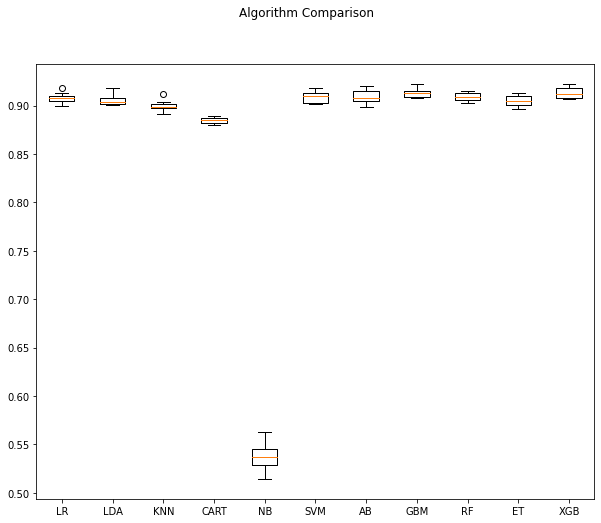

In [80]:
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [59]:
ensembles = []
ensembles.append(('XGB', xgb.XGBClassifier()))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed,shuffle = True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

XGB: 0.913483 (0.005552)


In [61]:
# prepare the model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
# estimate accuracy on validation dataset
predictions = model.predict(X_validation)
print("Accuracy in training set  : ", accuracy_score(y_train, model.predict(X_train)))
print("Accuracy in validation set: ", accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

Accuracy in training set  :  0.9174262121774908
Accuracy in validation set:  0.9130645944633318
[[5317  144]
 [ 393  323]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5461
           1       0.69      0.45      0.55       716

    accuracy                           0.91      6177
   macro avg       0.81      0.71      0.75      6177
weighted avg       0.90      0.91      0.90      6177



Precision, recall of class 1 are pretty low
Problem: imbalance data 

## HANDLE IMBALANCED DATASET

In [62]:
y1 = dat1['y']
X1 = dat1.drop(columns=['y'])

In [63]:
y1.value_counts()

0    36537
1     4639
Name: y, dtype: int64

In [64]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X_, y_ = sm.fit_resample(X1, y1)

In [65]:
y_.value_counts()

0    36537
1    36537
Name: y, dtype: int64

In [66]:
X_.shape, y_.shape

((73074, 34), (73074,))

In [67]:
X_train_, X_val_, y_train_, y_val_ = train_test_split(X_, y_, test_size=0.20, random_state=42, stratify = y_)

In [68]:
X_train_.shape, X_val_.shape

((58459, 34), (14615, 34))

In [69]:
num_folds = 10
seed = 7
scoring = 'accuracy'

In [70]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
  cv_results = cross_val_score(model, X_train_, y_train_, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.884073 (0.003651)
LDA: 0.873877 (0.003383)
KNN: 0.923314 (0.002711)
CART: 0.923861 (0.004563)
NB: 0.732684 (0.003887)
SVM: 0.906909 (0.002561)


In [71]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
ensembles.append(('XGB', xgb.XGBClassifier()))
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed,shuffle = True)
  cv_results = cross_val_score(model, X_train_, y_train_, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

AB: 0.917481 (0.002846)
GBM: 0.930618 (0.002687)
RF: 0.951145 (0.001492)
ET: 0.955644 (0.002033)
XGB: 0.929660 (0.002853)


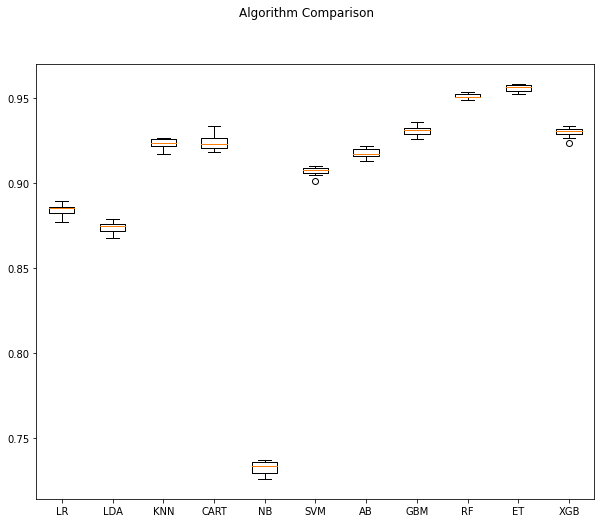

In [77]:
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [75]:
# prepare the model
model_ = ExtraTreesClassifier()
model_.fit(X_train_, y_train_)
# estimate accuracy on validation dataset
predictions = model_.predict(X_val_)
print("Accuracy in training set  : ", accuracy_score(y_train_, model_.predict(X_train_)))
print("Accuracy in validation set: ", accuracy_score(y_val_, predictions))
print(confusion_matrix(y_val_, predictions))
print(classification_report(y_val_, predictions))

Accuracy in training set  :  1.0
Accuracy in validation set:  0.9575094081423196
[[6838  470]
 [ 151 7156]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      7308
           1       0.94      0.98      0.96      7307

    accuracy                           0.96     14615
   macro avg       0.96      0.96      0.96     14615
weighted avg       0.96      0.96      0.96     14615

